In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
import os,glob
from PIL import Image

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

np.random.seed(3)

In [2]:
def plot_loss_curve(history):

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'b-', label='loss')
    plt.plot(history.history['val_loss'], 'r--', label='val_loss')
    plt.xlabel('Epoch')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], 'g-', label='accuracy')
    plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylim(0.7, 1)
    plt.legend()
    
    plt.show()

In [6]:
directory = 'C:/Users/dltmd/jupyterSave/img'
categories = ["0","1","2"]
nb_classes = len(categories)

w = 300 
h = 300
pixels = w*h*3

X = []
y = []

for idx, obj in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = directory + "/" + obj
    files = glob.glob(image_dir+"/*.jpg")
    print(obj, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((w, h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 10000 == 0:
            print(obj, " : ", f)

0  파일 길이 :  10000
0  :  C:/Users/dltmd/jupyterSave/img/0\food1.jpg
1  파일 길이 :  7500
1  :  C:/Users/dltmd/jupyterSave/img/1\interior1.jpg
2  파일 길이 :  5000
2  :  C:/Users/dltmd/jupyterSave/img/2\exterior1.jpg


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
xy = (X_train, X_test, y_train, y_test, X_val, y_val)
np.save("C:/Users/dltmd/jupyterSave/multi_image_data.npy", xy)

ok 22500


In [3]:
X_train, X_test, y_train, y_test, X_val, y_val = np.load("C:/Users/dltmd/jupyterSave/multi_image_data.npy")

X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [5]:
# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(16, input_shape=(300, 300, 3), 
                kernel_size=(3, 3), padding='same', activation='relu', name='conv_layer1')) 
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', name='conv_layer2')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.5)) 
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', name='conv_layer3')) 
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', name='conv_layer4')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.5)) 
model.add(Flatten()) 
model.add(Dense(512, activation='relu', name='hidden_layer1')) 
model.add(Dropout(rate=0.5)) 
model.add(Dense(256, activation='relu', name='hidden_layer2')) 
model.add(Dropout(rate=0.5)) 
model.add(Dense(3, activation='softmax', name='output_layer'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience = 15) # 조기종료 콜백함수 정의

history = model.fit(
        X_train, y_train, validation_data=(X_val, y_val), batch_size=100, epochs=10,
        callbacks=[early_stopping])

Epoch 1/10
  8/144 [>.............................] - ETA: 34:07 - loss: 5104.5630 - accuracy: 0.3580

KeyboardInterrupt: 

In [ ]:
plot_loss_curve(history)
print("train loss=", history.history['loss'][-1])
print("validation loss=", history.history['val_loss'][-1])

In [19]:
model.save('cnn02.h5')

INFO:tensorflow:Assets written to: cnn02\assets


In [7]:
model2 = Sequential()
model2.add(Conv2D(32, input_shape=(300, 300, 3) ,kernel_size=(3, 3), 
                  activation='relu', name='conv_layer1'))
model2.add(MaxPooling2D(pool_size=(2, 2))) 
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='conv_layer2')) 
model2.add(MaxPooling2D(pool_size=(2, 2))) 
model2.add(Dropout(0.2)) 
model2.add(Flatten())
model2.add(Dense(128, activation='relu', name='hidden_layer1')) 
model2.add(Dense(128, activation='relu', name='hidden_layer2')) 
model2.add(Dense(3, activation='softmax', name='output_layer'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience = 15) # 조기종료 콜백함수 정의

history2 = model2.fit(
        X_train, y_train, validation_data=(X_val, y_val), batch_size=100, epochs=10,
        callbacks=[early_stopping])

Epoch 1/10
144/144 [==============================] - 630s 4s/step - loss: 502.2911 - accuracy: 0.4873 - val_loss: 1.0185 - val_accuracy: 0.4931
Epoch 2/10
144/144 [==============================] - 625s 4s/step - loss: 0.7928 - accuracy: 0.6479 - val_loss: 0.8330 - val_accuracy: 0.6433
Epoch 3/10
144/144 [==============================] - 617s 4s/step - loss: 0.3618 - accuracy: 0.8680 - val_loss: 1.0500 - val_accuracy: 0.5611
Epoch 4/10
144/144 [==============================] - 615s 4s/step - loss: 0.4075 - accuracy: 0.8560 - val_loss: 1.2092 - val_accuracy: 0.6228
Epoch 5/10
144/144 [==============================] - 615s 4s/step - loss: 0.1229 - accuracy: 0.9610 - val_loss: 1.4780 - val_accuracy: 0.6236
Epoch 6/10
144/144 [==============================] - 616s 4s/step - loss: 0.0554 - accuracy: 0.9850 - val_loss: 2.0952 - val_accuracy: 0.6292
Epoch 7/10
144/144 [==============================] - 624s 4s/step - loss: 0.0353 - accuracy: 0.9906 - val_loss: 2.0897 - val_accuracy: 0.62

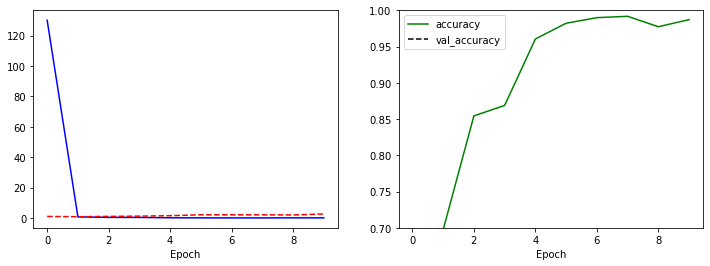

train loss= 0.04779933765530586
validation loss= 2.6234500408172607


In [9]:
plot_loss_curve(history2)
print("train loss=", history2.history['loss'][-1])
print("validation loss=", history2.history['val_loss'][-1])

In [17]:
model2.save('cnn01')

INFO:tensorflow:Assets written to: cnn01\assets


In [2]:
model2 = load_model("cnn01")
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer1 (Conv2D)         (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv_layer2 (Conv2D)         (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 341056)            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)              

In [11]:
# 5. 모델 평가하기
print("-- Evaluate --")
scores = model2.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model2.metrics_names[1], scores[1]*100))

-- Evaluate --
141/141 [==============================] - 49s 349ms/step - loss: 2.6821 - accuracy: 0.5989
accuracy: 59.89%


In [12]:
# 6. 모델 사용하기
print("-- Predict --")
output = model2.predict(X_test, y_test)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_img.class_indices)
print(output)

-- Predict --


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()